In [ ]:
import pandas as pd

data = pd.read_csv('/content/123.csv')
data2 = data
data2

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


In [ ]:
data.columns

Index(['country', 'adjusted_satisfaction', 'avg_satisfaction',
       'std_satisfaction', 'avg_income', 'median_income', 'income_inequality',
       'region', 'happyScore', 'GDP', 'country.1'],
      dtype='object')

In [ ]:
happy = data['happyScore']
income = data['avg_income']
ineq = data['income_inequality']

income.max()

26182.275

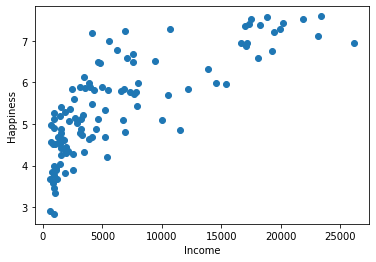

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.scatter(income,happy)
plt.show()

#Сортировка и филтрация

In [ ]:
data.sort_values('avg_income', inplace =True,ignore_index = True)
richest = data[ data['avg_income'] > 12000 ]

In [ ]:
richest.iloc[0]

country                                      Slovenia
adjusted_satisfaction                            57.0
avg_satisfaction                                  7.0
std_satisfaction                                 2.14
avg_income                                  12174.765
median_income                               11071.995
income_inequality                            24.67875
region                   'Central and Eastern Europe'
happyScore                                      5.848
GDP                                           1.18498
country.1                                    Slovenia
Name: 90, dtype: object

In [ ]:
import numpy as np

mean_rich = np.mean(richest['avg_income'])
mean_basic = np.mean(data['avg_income'])

print(mean_basic,mean_rich)

6442.751416214639 18445.75278911565


#Labeling points o a graph

Text(23400.04, 7.587000000000001, 'Switzerland')

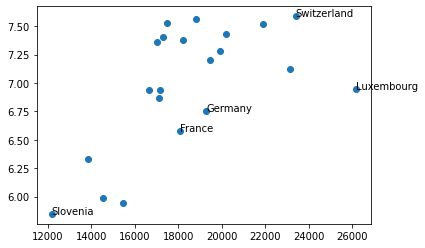

In [ ]:
plt.scatter(richest['avg_income'],richest['happyScore'])

plt.text(richest.iloc[-1]['avg_income'],
         richest.iloc[-1]['happyScore'],
         richest.iloc[-1]['country'])

plt.text(richest.iloc[0]['avg_income'],
         richest.iloc[0]['happyScore'],
         richest.iloc[0]['country'])

plt.text(richest.iloc[10]['avg_income'],
         richest.iloc[10]['happyScore'],
         richest.iloc[10]['country'])


plt.text(richest.iloc[13]['avg_income'],
         richest.iloc[13]['happyScore'],
         richest.iloc[13]['country'])

plt.text(richest.iloc[19]['avg_income'],
         richest.iloc[19]['happyScore'],
         richest.iloc[19]['country'])



In [ ]:
richest.happyScore.max()

7.587000000000001

In [ ]:
richest = richest.reset_index(drop=True)

In [ ]:
richest.happyScore.idxmax()

19

In [ ]:
richest.loc[ richest.happyScore.idxmax() ]

country                       Switzerland
adjusted_satisfaction                70.0
avg_satisfaction                      8.0
std_satisfaction                     1.62
avg_income                       23400.04
median_income                    19442.92
income_inequality                   32.93
region                   'Western Europe'
happyScore                          7.587
GDP                               1.39651
country.1                     Switzerland
Name: 19, dtype: object

#Итерации

In [ ]:
for k,row in richest.iterrows():
  print(row['country'])

Slovenia
Spain
Japan
Italy
Ireland
Sweden
United Kingdom
Belgium
Finland
Denmark
France
Netherlands
Iceland
Germany
Austria
Australia
Canada
Norway
United States
Switzerland
Luxembourg


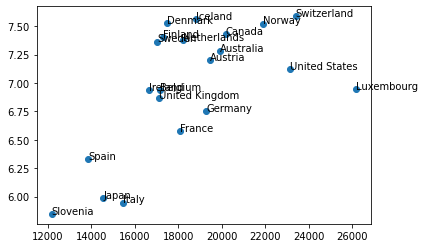

In [ ]:
plt.scatter(richest['avg_income'],richest['happyScore'])
for k,row in richest.iterrows():
  plt.text(richest.iloc[k]['avg_income'],
         richest.iloc[k]['happyScore'],
         richest.iloc[k]['country'])

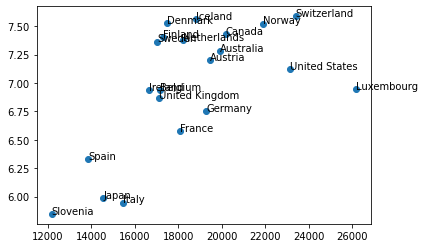

In [ ]:
plt.scatter(richest['avg_income'],richest['happyScore'])
for k,row in richest.iterrows():
  plt.text(row['avg_income'],
         row['happyScore'],
        row['country'])

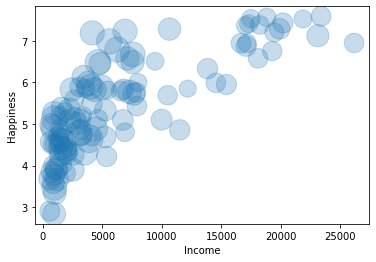

In [ ]:
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.scatter(income,happy, s = ineq*12,alpha = 0.25)
plt.show()

счастье >6.5 and доход < 12k

In [ ]:
happiest =  data[(data['happyScore'] > 6.5) & (data['avg_income'] < 12000)]
happiest

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
59,Mexico,69.0,8.3,2.02,4148.000000,2646.973333,48.974444,'Latin America and Caribbean',7.187,1.02054,Mexico
70,Brazil,56.0,6.9,2.19,5567.235000,3294.180000,54.333750,'Latin America and Caribbean',6.983,0.98124,Brazil
71,Panama,65.0,7.8,2.02,6250.360000,3814.213333,52.664444,'Latin America and Caribbean',6.786,1.06353,Panama
75,Costa Rica,73.0,8.5,1.71,6901.466667,4373.520000,49.018889,'Latin America and Caribbean',7.226,0.95578,Costa Rica
77,Argentina,60.0,7.1,1.91,7101.120000,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
80,Chile,55.0,6.8,2.13,7557.990000,4448.010000,51.270000,'Latin America and Caribbean',6.670,1.10715,Chile
85,Czech Republic,54.0,6.6,2.13,9430.905000,8363.370000,26.413750,'Central and Eastern Europe',6.505,1.17898,Czech Republic
88,Israel,61.0,7.3,2.09,10645.240000,8234.680000,41.940000,'Middle East and Northern Africa',7.278,1.22857,Israel


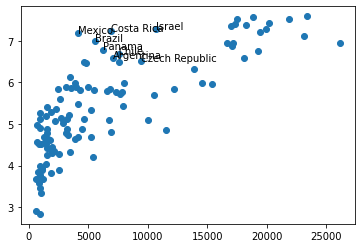

In [ ]:
m_inc = data['median_income']
plt.scatter(income,happy)
for k,row in happiest.iterrows():
  plt.text(row['avg_income'],
         row['happyScore'],
        row['country'])

In [ ]:
happiest

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
88,Israel,61.0,7.3,2.09,10645.240000,8234.680000,41.940000,'Middle East and Northern Africa',7.278,1.22857,Israel
75,Costa Rica,73.0,8.5,1.71,6901.466667,4373.520000,49.018889,'Latin America and Caribbean',7.226,0.95578,Costa Rica
59,Mexico,69.0,8.3,2.02,4148.000000,2646.973333,48.974444,'Latin America and Caribbean',7.187,1.02054,Mexico
70,Brazil,56.0,6.9,2.19,5567.235000,3294.180000,54.333750,'Latin America and Caribbean',6.983,0.98124,Brazil
71,Panama,65.0,7.8,2.02,6250.360000,3814.213333,52.664444,'Latin America and Caribbean',6.786,1.06353,Panama
80,Chile,55.0,6.8,2.13,7557.990000,4448.010000,51.270000,'Latin America and Caribbean',6.670,1.10715,Chile
77,Argentina,60.0,7.1,1.91,7101.120000,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
85,Czech Republic,54.0,6.6,2.13,9430.905000,8363.370000,26.413750,'Central and Eastern Europe',6.505,1.17898,Czech Republic


In [ ]:
happiest = happiest.sort_values(by='happyScore',ascending=False)

Text(0.5, 1.0, 'The Happiest poor')

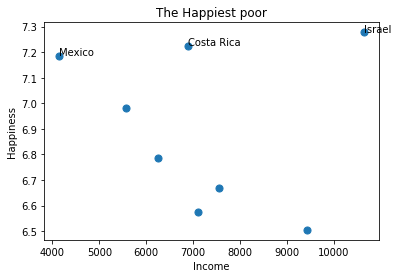

In [ ]:
happiest = happiest.sort_values(by='happyScore',ascending=False)

plt.xlabel('Income')
plt.ylabel('Happiness')


plt.scatter(happiest['avg_income'],happiest['happyScore'],s=50)

#for k,row in happiest.iterrows():
#    plt.text(row['avg_income'],
#         row['happyScore'],
#        row['country'])

plt.text(happiest.iloc[0]['avg_income'],
         happiest.iloc[0]['happyScore'],
         happiest.iloc[0]['country'])

plt.text(happiest.iloc[1]['avg_income'],
         happiest.iloc[1]['happyScore'],
         happiest.iloc[1]['country'])


plt.text(happiest.iloc[2]['avg_income'],
         happiest.iloc[2]['happyScore'],
         happiest.iloc[2]['country'])
plt.title('The Happiest poor')

#Kmeans

In [ ]:
happy2 = data2['happyScore']
income2 = data2['avg_income']

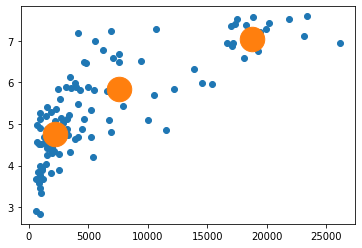

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

income_happy = np.column_stack((income2,happy2))

km_res = KMeans(n_clusters=3).fit(income_happy)
clusters = km_res.cluster_centers_

plt.scatter(income,happy)
plt.scatter(clusters[:,0],clusters[:,1],s = 600)


Параметр для нампи чтобы показывать числа полностью
https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
 a = np.array(clusters)
 a

array([[ 2199.1212108 ,     4.75472308],
       [18759.30217857,     7.0327    ],
       [ 7577.55711256,     5.85080769]])